# Part II - (Ford GoBike Explanatory)
## by (Ahmed Muhumed)

## Investigation Overview

> In this explanatory data analysis, I am going to investigate the descriptive statistics of the duration of the trips, the gender composition of the bikers, start stations that are mostly used by the bikers, the age distribution of the users, the bikes that are mostly used, the relationship between the age of the bikers and the duration of the trips, user types according to round trips, are the customers usually take a round trips or subscriber take a round trips and the relationship between the age of the bikers, gender of the bikers and their user type.



## Dataset Overview

> Ford, in collaboration with Motivate has launched Ford GoBike – a regional bike-share network designed to enhance sustainable transportation in the San Francisco Bay Area. Designed for the hilly urban environment of San Francisco, Ford GoBikes are built to be comfortable and easy to ride. Ford GoBike is the Bay Area's bike share connecting you to work, friends and your favorite restaurant. Thousands of bikes to pick up and drop off anywhere. No schedule. No rails. Ride your way. Available in San Francisco, San Jose, and the East Bay 24/7. 

>This dataset contains 174952 entries and a total of 16 columns. In other words, we have 16 features in this dataset:
         
         1. duration of the trip in seconds
         2. start time and end time
         3. id, name and the coordinates of the start station
         5. id, name and the coordinates of the end station
         6. bike id
         7. user type (Customer or Subscriber)
         8. birth year of the member
         9. member gender (Female, Male or Other) 
         10. bike_share_for_all_trip - if it is round trip or not    
         
> Most of the variables are numeric (int and float), and there are object variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#let us drop all the null-values, otherwise it will affect the data.
df = df.dropna()

In [4]:
#let us convert the start time and end time data type into datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
#the data type of start_station_id, end_station_id and member-birth year are all supposed to be integer, not a float.
pd.options.mode.chained_assignment = None  # default='warn'
df[['start_station_id','end_station_id','member_birth_year']]=df[['start_station_id','end_station_id','member_birth_year']].apply(np.int64)

## The descriptive statistics of the duration of the trips

>This visual indicates the descriptive statistics of the duration column in our dataset. We have selected the desired parameters such as; mean, standard deviation, min, max and first, second and third quartiles, and then applied logarithmic scale in order to get transformed plot that shows the message more clearer.

>In slide below, we have the minimum trip duration, maximum trip duration, mean, standard deviation, first, second and third quartiles. The mean is approximately 2.84 which is a log scale, and if we use logx = 2.84, we can get the mean which is approximately 700 seconds. So, 700/60 is equal to 11.7 minutes. This means that the average trip duration is 11.7 minutes

In [6]:
#this function plots bar charts by taking multiple arguments at one time
def barcharts(data, title: str, xlabel: str="", ylabel: str=""):
    plt.figure(figsize = [15, 8])
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
#this function plots horizontal bar charts
def barhcharts(data, title: str, xlabel: str="", ylabel: str=""):
    plt.figure(figsize = [10, 8])
    data.plot(kind='barh')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

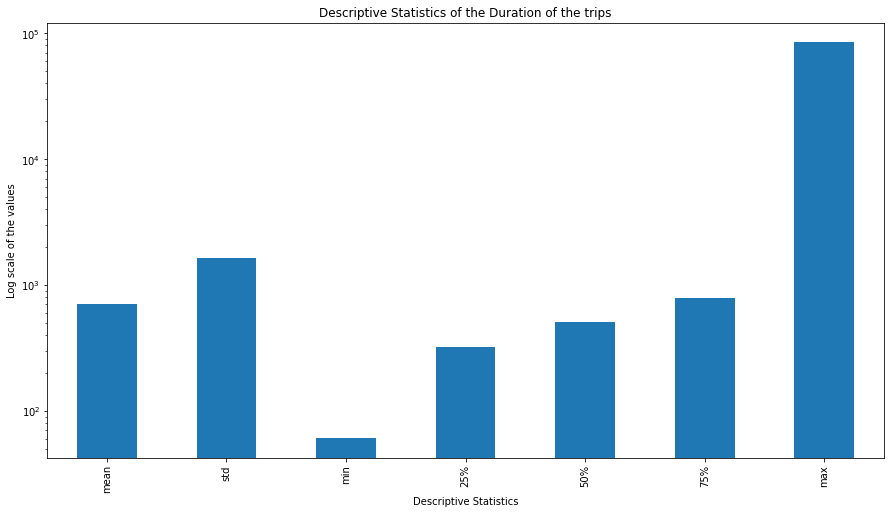

In [7]:
#this code statistically describes the duration of the trip
described_df = df['duration_sec'].describe().loc[['mean','std','min','25%','50%','75%','max']]

#this code displays the described data and its logarithmic scale
described_df, np.log10(described_df)

barcharts(described_df, "Descriptive Statistics of the Duration of the trips", "Descriptive Statistics", "Log scale of the values")
plt.yscale('log')

##  The gender distribution of the bike users

> The gender composition of the dataset, we have males, females and others.

> In this slide, we can see that 74.6% of the bikers were male, where 23.3% were female and the rest was neither male nor female. In other words, we can say each 100 of the biker, 74 of them were male, we only 23 were female.

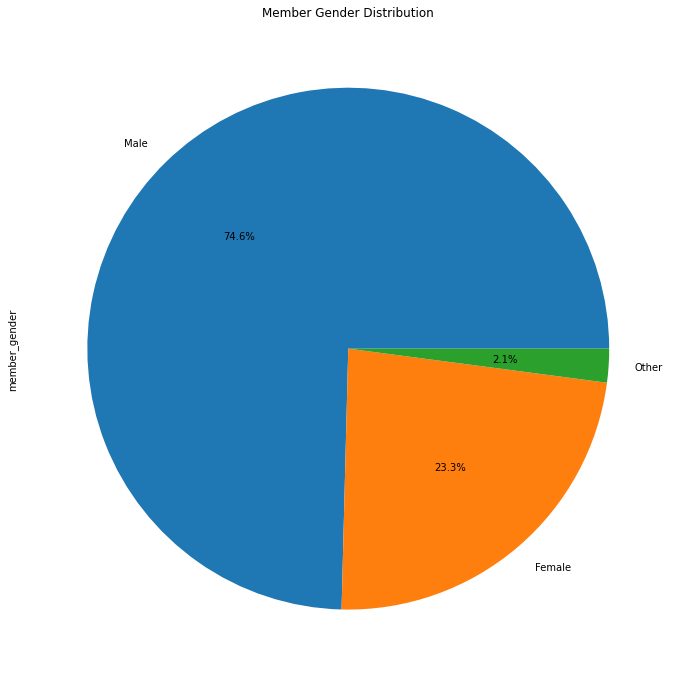

In [8]:
#this code plots a pie chart that shows the distribution of the member_gender
df['member_gender'].value_counts().plot(kind='pie', title="Member Gender Distribution", autopct='%1.1f%%', figsize = (20,12));

##  Start stations that are mostly used by the bikers

> There are more than 300 start stations in our dataset, so I have visualized the top ten start stations that are mostly used.

> In the slide below, we have the start stations that are mostly used by the riders. Market St is the mostly used start station.

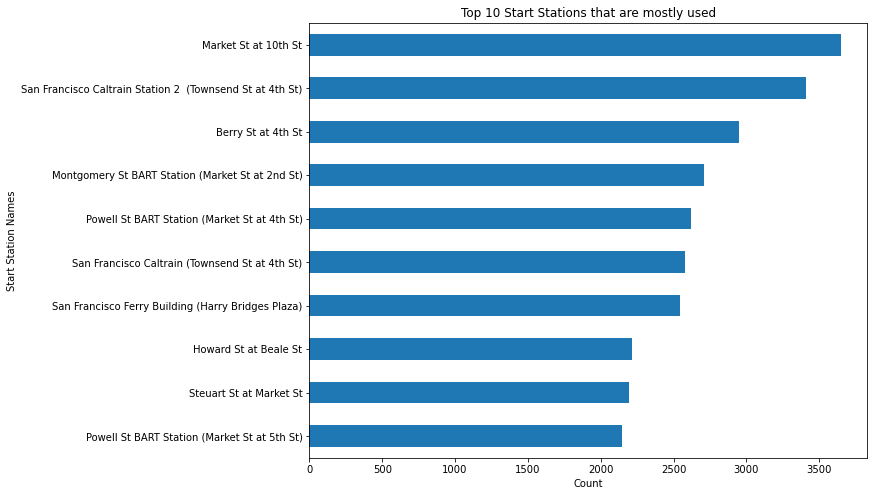

In [9]:
#since the start station are hundreds, I only choose the top ten end stations that are mostly used
df_start = df['start_station_name'].value_counts().head(10).sort_values()

#this is the visualization of the top ten start station that are mostly used by the bikers
barhcharts(df_start,"Top 10 Start Stations that are mostly used",'Count','Start Station Names');

## The age distribution of the users

> In here, we are going to focus on the age distribution of the users

> From the chart in the below slide, we can easily explore that the distribution of biker's age is between 25 to almost 45. 34 old bikers have the highest distribution of the rides. 

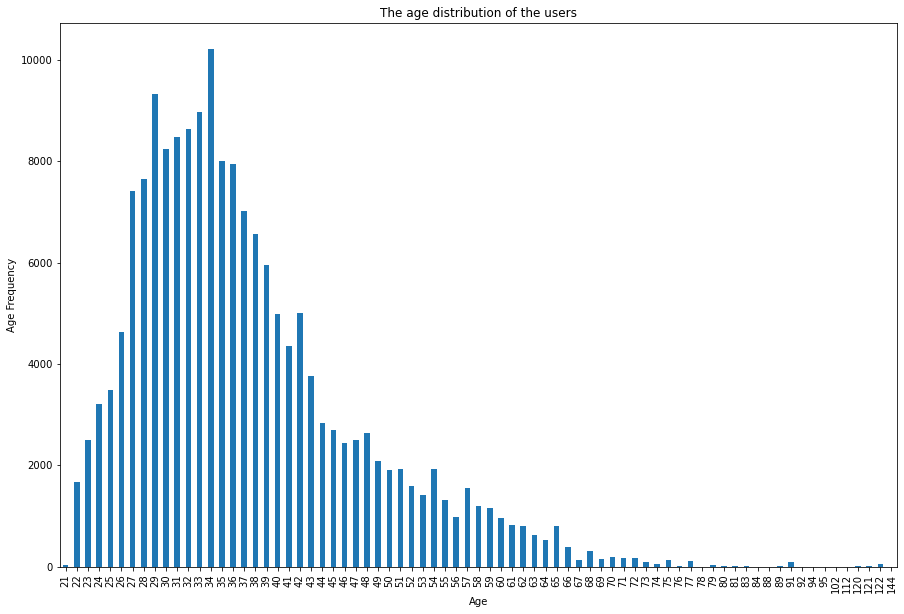

In [10]:
#so, since we have birth years, I did a subtraction in order to get the exact ages
(2022 - df['member_birth_year']).value_counts().sort_index().plot(kind='bar',figsize = [15, 10]);
plt.ylabel('Age Frequency')
plt.xlabel('Age');
plt.title('The age distribution of the users');

## The bikes that are mostly used by bikers

> The total number of different bikes in our dataset is 75, so, in here I have selected the top ten mostly used bikes

> From the chart in the subslide, we can the top ten bikes that are mostly used by the bikers. A bake with an ID of 4794 is one which mostly used by the riders.

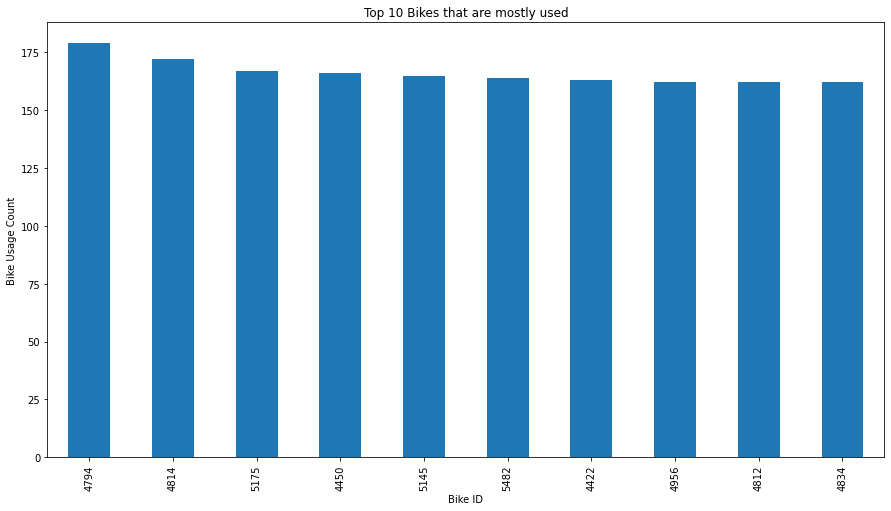

In [11]:
#let select the top ten bikes that are mostly used by the riders
df_bikeid = df['bike_id'].value_counts().head(10)

#this code visualizes a bar chart that contains the top ten bikes that are mostly used 
barcharts(df_bikeid, "Top 10 Bikes that are mostly used", "Bike ID", "Bike Usage Count")

## The relationship between the age of the bikers and the duration of the trips

> In this slide, I have explored the relationship between the age of the bikers and the duration of the trips.

> From the below clustered bar chart, we have explored and visualized the member gender to  the frequency of user types. We can see that the males have the highest subscribers and customers, where the females are next the males and the other genders have the smallest number of subscriber/customer user types.

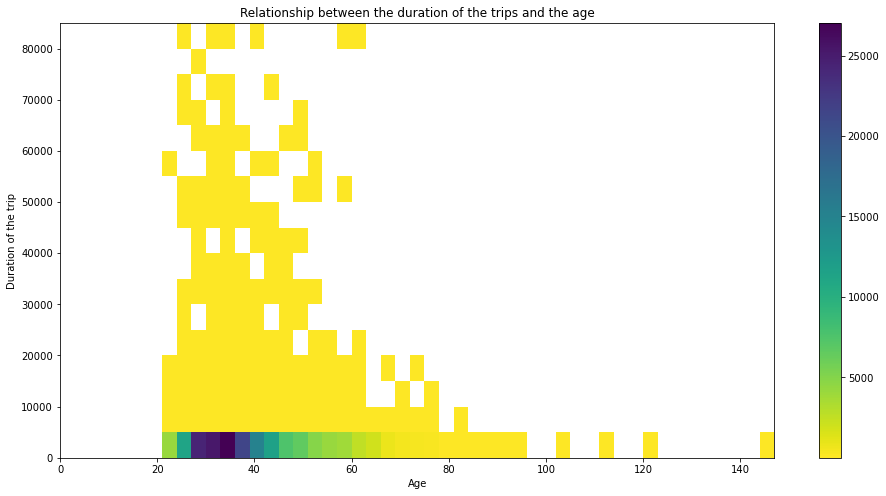

In [12]:
#since age is in birth_year format, let us subtract 2022 in order to the exact ages
df['member_birth_year'] = 2022 - df['member_birth_year']

#in this plot, we gonna explore the relationship between the age of the bikers and the duration of the trips
plt.figure(figsize = [16, 8])
bins_x = np.arange(0, 145+5, 3);
bins_y = np.arange(0, 85000+5000, 5000);
plt.hist2d(data = df, x = 'member_birth_year', y = 'duration_sec', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);
plt.colorbar();
plt.ylabel('Duration of the trip')
plt.xlabel('Age');
plt.title('Relationship between the duration of the trips and the age');

## The relationship between the age of the bikers, gender of the bikers and their user type

> In this slide, we are going to focus on the relationship between the age of the bikers, gender of the bikers and their user type, it is a mutivariate explanatory data analysis.

> The violin plot in the subslide, I have compared the relationship between member gender, age of the member and user types. From the plot, it can be easily observed that the distribution of subscriber is always higher than the distribution of the customers. Moreover, the first and third inter quartiles user types varies when we have other gender related to their age. Also, the third  quartile of the user types varies in females on the basis of their age.  In males, the first and third quartiles of the user types are almost the same and their age is roughly between 35 and 43. In other gender type, the first and third quartiles of the customers have age values that are close to the median.

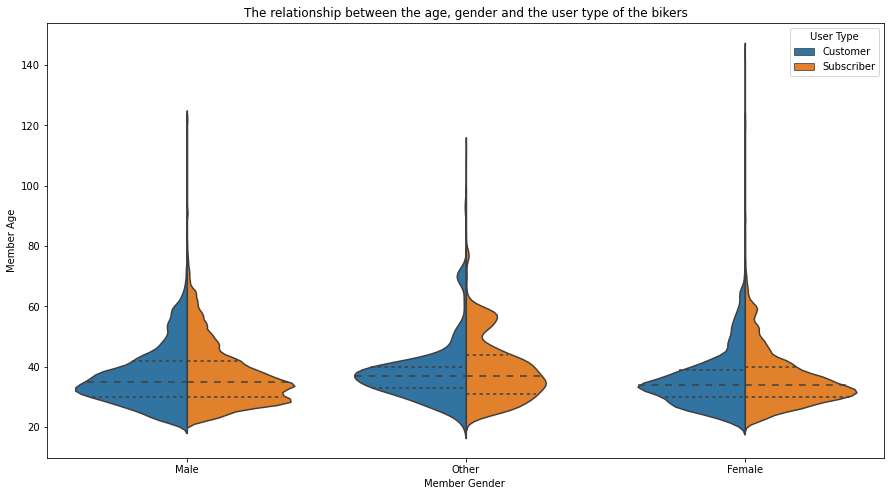

In [13]:
plt.figure(figsize = [15, 8])
sb.violinplot(data=df, x='member_gender', y='member_birth_year', hue="user_type", split=True,  inner="quartile")
plt.xlabel("Member Gender ")
plt.ylabel("Member Age")
plt.title('The relationship between the age, gender and the user type of the bikers');
plt.legend(title="User Type");